In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
import string
import re

In [2]:
from skimpy import clean_columns

### Understanding Variables + Data Cleaning

In [3]:
data = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep='\t')
#print(data.columns)
print(data.shape)

(84878, 56)


/var/folders/tx/ccgvwwd562sfhw5ybj094vxc0000gn/T/ipykernel_13773/2587599914.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep='\t')


In [49]:
data = clean_columns(data)
data.columns

56 column names have been cleaned

Index(['index_row', 'id', 'logo_url', 'program_name', 'description',
       'org_name', 'category_name', 'capacity', 'min_age', 'max_age',
       'meeting_type', 'address', 'city', 'state', 'zipcode', 'online_address',
       'program_url', 'registration_url', 'registration_open',
       'registration_deadline', 'start_date', 'end_date', 'start_time',
       'end_time', 'scheduled_mon', 'scheduled_tues', 'scheduled_fri',
       'scheduled_sat', 'scheduled_sun', 'scheduled_thurs', 'scheduled_wed',
       'fri_end_time', 'fri_start_time', 'mon_end_time', 'mon_start_time',
       'sat_end_time', 'sat_start_time', 'sun_end_time', 'sun_start_time',
       'thurs_end_time', 'thurs_start_time', 'tues_end_time',
       'tues_start_time', 'wed_end_time', 'wed_start_time', 'contact_name',
       'contact_email', 'contact_phone', 'program_price',
       'geographic_cluster_name', 'program_pays_participants',
       'program_has_scholarships', 'program_provides_transportation',
       'latitude', 

In [50]:
data.category_name = data.category_name.apply(lambda x: x.lower() if isinstance(x, str) else x)

def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return text
    
def replace_spaces_with_underscore(text):
    if isinstance(text, str):
        # Replace one or more whitespace characters with a single underscore
        return re.sub(r'\s+', '_', text)
    else:
        return text
    
def remove_trailing_underscores(text):
    if isinstance(text, str):
        # Remove any trailing underscores
        text = text.rstrip('_')
        return text
    else:
        return text

data.category_name = data.category_name.apply(remove_punctuation)
data.category_name = data.category_name.apply(replace_spaces_with_underscore)
data.category_name = data.category_name.apply(remove_trailing_underscores)

data.category_name.value_counts()

sports_wellness               44079
music_art                     19922
reading_writing                8802
academic_support               2686
nature                         1788
science                        1533
building_fixing_things         1208
computers                      1120
helping_your_community          674
performance                     597
healthcare                      581
food                            546
work_career                     445
managing_money                  357
digital_media                   239
social_studies                  172
math                             40
customerhuman_service            39
teaching                         21
transportation                   13
law                               7
science_math                      5
building_and_fixing_things        2
Name: category_name, dtype: int64

In [51]:
data.nunique()

index_row                          84878
id                                 74241
logo_url                            3112
program_name                       20887
description                        17560
org_name                             388
category_name                         23
capacity                             189
min_age                               34
max_age                               63
meeting_type                           2
address                             1139
city                                  24
state                                  4
zipcode                              141
online_address                     46970
program_url                        70699
registration_url                   66709
registration_open                    289
registration_deadline                735
start_date                          1112
end_date                            1152
start_time                           145
end_time                             240
scheduled_mon   

In [52]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,capacity,min_age,max_age,latitude,longitude
count,84878.000000,77745.000000,84878.000000,84878.000000,75163.000000,75163.000000
mean,114792.018309,10003.662756,8.209406,42.864335,41.855303,-87.681331
std,23521.069115,942482.597419,6.501568,41.948635,0.099636,0.181691
min,76358.000000,0.000000,0.000000,0.000000,39.482388,-120.962090
25%,94212.000000,10.000000,3.000000,10.000000,41.780102,-87.716202
50%,114619.000000,15.000000,6.000000,18.000000,41.865665,-87.680397
75%,134847.750000,21.000000,13.000000,99.000000,41.951401,-87.641602
max,156758.000000,99101812.000000,99.000000,200.000000,42.147499,-87.530502


In [12]:
data.dtypes

index_row                           object
id                                   int64
logo_url                            object
program_name                        object
description                         object
org_name                            object
category_name                       object
capacity                           float64
min_age                              int64
max_age                              int64
meeting_type                        object
address                             object
city                                object
state                               object
zipcode                             object
online_address                      object
program_url                         object
registration_url                    object
registration_open                   object
registration_deadline               object
start_date                          object
end_date                            object
start_time                          object
end_time   

In [13]:
data.isna().sum()

index_row                              0
id                                     0
logo_url                           79843
program_name                           0
description                            0
org_name                               0
category_name                          2
capacity                            7133
min_age                                0
max_age                                0
meeting_type                           0
address                             8773
city                                6229
state                               6230
zipcode                             8720
online_address                     27413
program_url                         1302
registration_url                    8851
registration_open                  83235
registration_deadline              60553
start_date                             0
end_date                               0
start_time                         12109
end_time                           12120
scheduled_mon   

### Cleaning dataset

In [14]:
num_NA = data.isna().sum()

def na_filter(na, threshold = .8): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/data.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
data_cleaned = data[na_filter(num_NA)]
data_cleaned.columns
print(data.shape)
print(data_cleaned.shape)

(84878, 56)
(84878, 33)


In [15]:
# Removed columns with 80% or more null values
data_cleaned.columns

Index(['index_row', 'id', 'program_name', 'description', 'org_name',
       'category_name', 'capacity', 'min_age', 'max_age', 'meeting_type',
       'address', 'city', 'state', 'zipcode', 'online_address', 'program_url',
       'registration_url', 'registration_deadline', 'start_date', 'end_date',
       'start_time', 'end_time', 'contact_name', 'contact_email',
       'contact_phone', 'program_price', 'geographic_cluster_name',
       'program_pays_participants', 'program_has_scholarships',
       'program_provides_transportation', 'latitude', 'longitude',
       'program_provides_free_food'],
      dtype='object')

In [56]:
data.geographic_cluster_name.value_counts().head(10)

IRVING PARK                    7312
NEAR WEST SIDE                 3512
MORGAN PARK                    3310
Bronzeville/South Lakefront    2815
PULLMAN                        2751
LOOP                           2574
AUSTIN                         1884
WEST TOWN                      1774
AVONDALE                       1605
LOGAN SQUARE                   1599
Name: geographic_cluster_name, dtype: int64

In [54]:
data.columns

Index(['index_row', 'id', 'logo_url', 'program_name', 'description',
       'org_name', 'category_name', 'capacity', 'min_age', 'max_age',
       'meeting_type', 'address', 'city', 'state', 'zipcode', 'online_address',
       'program_url', 'registration_url', 'registration_open',
       'registration_deadline', 'start_date', 'end_date', 'start_time',
       'end_time', 'scheduled_mon', 'scheduled_tues', 'scheduled_fri',
       'scheduled_sat', 'scheduled_sun', 'scheduled_thurs', 'scheduled_wed',
       'fri_end_time', 'fri_start_time', 'mon_end_time', 'mon_start_time',
       'sat_end_time', 'sat_start_time', 'sun_end_time', 'sun_start_time',
       'thurs_end_time', 'thurs_start_time', 'tues_end_time',
       'tues_start_time', 'wed_end_time', 'wed_start_time', 'contact_name',
       'contact_email', 'contact_phone', 'program_price',
       'geographic_cluster_name', 'program_pays_participants',
       'program_has_scholarships', 'program_provides_transportation',
       'latitude', 

In [57]:
data.meeting_type.value_counts()

face_to_face    73036
online          11842
Name: meeting_type, dtype: int64

### Visualizations

<AxesSubplot:>

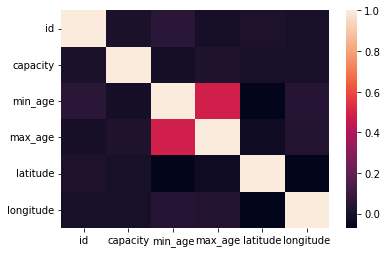

In [16]:
# Correlation
sns.heatmap(data.corr())

/Users/adazhong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


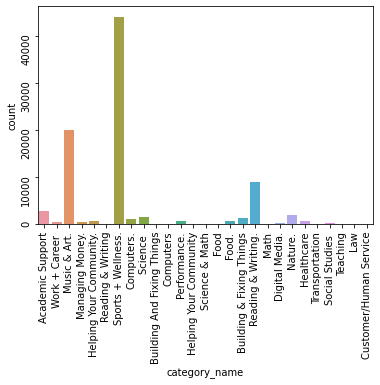

/Users/adazhong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


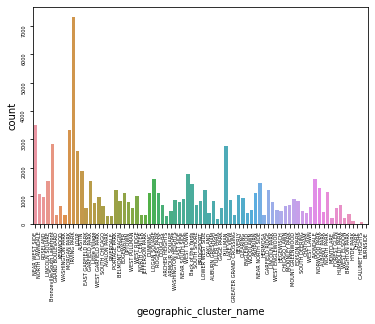

In [18]:
g = sns.countplot(data.category_name)
g.tick_params(labelrotation=90)
plt.show()

p = sns.countplot(data.geographic_cluster_name)
p.tick_params(labelrotation=90, labelsize=5)
plt.show()

#### Sports and Wellness

In [23]:
grouped=data[data.category_name=='Sports + Wellness.'].groupby('geographic_cluster_name')
grouped.count().head(10)

,index_row,id,logo_url,program_name,description,org_name,category_name,capacity,min_age,max_age,...,contact_name,contact_email,contact_phone,program_price,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food
geographic_cluster_name,,,,,,,,,,,,,,,,,,,,,
ALBANY PARK,183,183,2,183,183,183,183,181,183,183,...,181,179,179,183,183,183,183,183,183,183
ARCHER HEIGHTS,148,148,1,148,148,148,148,145,148,148,...,145,141,141,148,148,148,148,148,148,148
ARMOUR SQUARE,216,216,0,216,216,216,216,200,216,216,...,200,197,197,216,216,216,216,216,216,216
ASHBURN,679,679,2,679,679,679,679,663,679,679,...,663,645,645,679,679,679,679,679,679,679
AUBURN GRESHAM,322,322,2,322,322,322,322,312,322,322,...,312,294,294,322,322,322,322,322,322,322
AUSTIN,859,859,14,859,859,859,859,802,859,859,...,804,759,759,859,859,859,856,858,858,856
AVALON PARK,91,91,1,91,91,91,91,87,91,91,...,87,86,86,91,91,91,91,91,91,91
AVONDALE,1482,1482,76,1482,1482,1482,1482,1478,1482,1482,...,1478,1263,1263,1482,1482,1482,1482,1482,1482,1482
BELMONT CRAGIN,479,479,8,479,479,479,479,461,479,479,...,461,445,445,479,479,479,479,479,479,479


In [65]:
pd.crosstab(data['Geographic Cluster Name'],data['Category Name'],margins = True).sort_values(by = 'All',ascending = False)

Category Name,Academic Support,Building & Fixing Things,Computers.,Customer/Human Service,Digital Media.,Food.,Healthcare,Helping Your Community.,Law,Managing Money.,...,Nature.,Performance.,Reading & Writing.,Science,Social Studies,Sports + Wellness.,Teaching,Transportation,Work + Career,All
Geographic Cluster Name,,,,,,,,,,,,,,,,,,,,,
All,2214,1096,806,29,101,417,499,476,3,245,...,1701,479,6261,1172,119,43072,6,12,238,76774
IRVING PARK,47,124,1,0,1,6,6,3,0,6,...,96,12,65,31,1,6329,0,0,0,7312
NEAR WEST SIDE,100,5,16,1,2,5,8,24,1,5,...,34,7,172,16,3,2768,0,0,20,3512
MORGAN PARK,13,0,1,0,0,0,1,3,0,0,...,11,5,30,0,2,3110,0,0,0,3310
Bronzeville/South Lakefront,93,17,22,1,5,18,12,24,0,30,...,96,18,304,65,10,1296,0,4,16,2815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FULLER PARK,3,0,0,0,0,0,0,0,0,0,...,9,3,9,0,0,117,0,0,0,177
HYDE PARK,7,1,6,0,0,1,1,2,0,0,...,2,6,0,4,0,61,0,1,2,116
CALUMET HEIGHTS,4,1,0,1,0,0,6,5,0,0,...,0,0,0,0,0,42,0,0,2,81


In [53]:
data.category_name.value_counts()

sports_wellness               44079
music_art                     19922
reading_writing                8802
academic_support               2686
nature                         1788
science                        1533
building_fixing_things         1208
computers                      1120
helping_your_community          674
performance                     597
healthcare                      581
food                            546
work_career                     445
managing_money                  357
digital_media                   239
social_studies                  172
math                             40
customerhuman_service            39
teaching                         21
transportation                   13
law                               7
science_math                      5
building_and_fixing_things        2
Name: category_name, dtype: int64